In [8]:
def newton_raphson_squares(S, tolerance=0.003):
    """
    Calculates the square root of S using the Newton-Raphson method
    and prints the squaring step to prove convergence.
    """
    
    # 1. INITIALIZATION
    # We need a starting guess for the square root (x). 
    # S / 2.0 is a safe, standard starting point for positive numbers.
    x = S / 2.0  
    iteration = 0
    
    print(f"\n--- Processing Number: {S} ---")
    
    # 2. TABLE SETUP
    # We print headers with fixed spacing (<5, <15) to make the output readable.
    # 'Dist from S' shows the error between our current x^2 and the target S.
    print(f"{'Iter':<5} {'Approx (x)':<15} {'Square (x^2)':<15} {'Dist from S'}")
    print("-" * 55)
    
    # 3. ITERATION LOOP
    # We use an infinite loop that will only break when we reach the desired accuracy.
    while True:
        iteration += 1
        
        # Apply the Newton-Raphson Formula: x(n+1) = 0.5 * (x(n) + S / x(n))
        # This formula geometrically finds the intersection of the tangent line 
        # with the x-axis to refine the guess.
        x_new = 0.5 * (x + S / x)
        
        # VERIFICATION STEPS
        # Calculate x^2 to see how close it is to the original number S.
        current_square = x_new ** 2
        
        # Calculate the 'residual' or difference. Ideally, this should approach 0.
        distance = current_square - S
        
        # Print the current step's data formatted to 6 decimal places.
        print(f"{iteration:<5} {x_new:<15.6f} {current_square:<15.6f} {distance:+.6f}")
        
        # 4. CONVERGENCE CHECK (The Stopping Criterion)
        # We check if the change between the new guess and the old guess is 
        # smaller than our tolerance (0.003).
        if abs(x_new - x) < tolerance:
            # If the change is tiny, we have converged to the answer.
            break
            
        # 5. UPDATE
        # If we haven't converged yet, update x to be the new guess 
        # and run the loop again.
        x = x_new

# --- DRIVER CODE ---
# List of numbers to find the square root for
numbers = [3, 20, 7, 99]

# Loop through each number and run the function
for n in numbers:
    newton_raphson_squares(n)


--- Processing Number: 3 ---
Iter  Approx (x)      Square (x^2)    Dist from S
-------------------------------------------------------
1     1.750000        3.062500        +0.062500
2     1.732143        3.000319        +0.000319
3     1.732051        3.000000        +0.000000

--- Processing Number: 20 ---
Iter  Approx (x)      Square (x^2)    Dist from S
-------------------------------------------------------
1     6.000000        36.000000       +16.000000
2     4.666667        21.777778       +1.777778
3     4.476190        20.036281       +0.036281
4     4.472138        20.000016       +0.000016
5     4.472136        20.000000       +0.000000

--- Processing Number: 7 ---
Iter  Approx (x)      Square (x^2)    Dist from S
-------------------------------------------------------
1     2.750000        7.562500        +0.562500
2     2.647727        7.010460        +0.010460
3     2.645752        7.000004        +0.000004

--- Processing Number: 99 ---
Iter  Approx (x)      Square (x

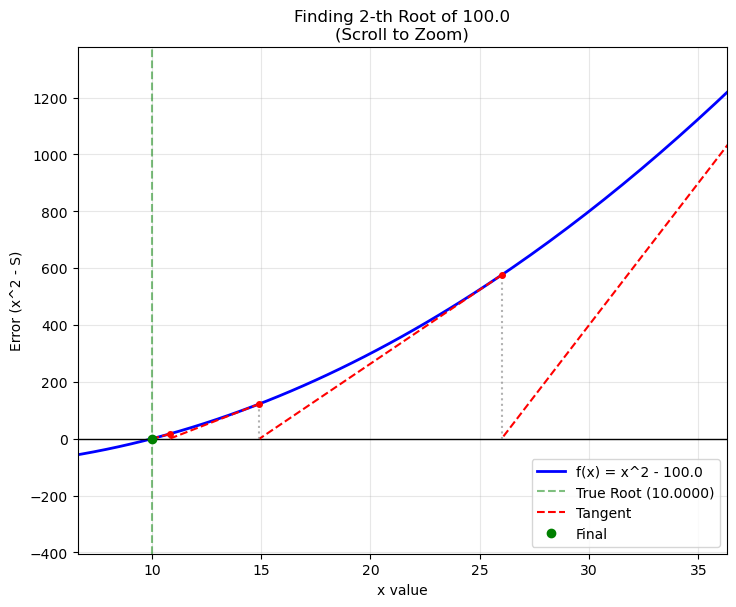

In [20]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt
import numpy as np

# --- ZOOM HANDLER (Scroll Wheel) ---
class ZoomHandler:
    def __init__(self, ax, base_scale=1.2):
        self.ax = ax
        self.base_scale = base_scale

    def zoom_fun(self, event):
        if event.inaxes != self.ax: return
        cur_xlim = self.ax.get_xlim()
        cur_ylim = self.ax.get_ylim()
        xdata, ydata = event.xdata, event.ydata
        
        if event.button == 'up': scale_factor = 1 / self.base_scale
        elif event.button == 'down': scale_factor = self.base_scale
        else: scale_factor = 1
            
        new_width = (cur_xlim[1] - cur_xlim[0]) * scale_factor
        new_height = (cur_ylim[1] - cur_ylim[0]) * scale_factor
        relx = (cur_xlim[1] - xdata) / (cur_xlim[1] - cur_xlim[0])
        rely = (cur_ylim[1] - ydata) / (cur_ylim[1] - cur_ylim[0])

        self.ax.set_xlim([xdata - new_width * (1 - relx), xdata + new_width * relx])
        self.ax.set_ylim([ydata - new_height * (1 - rely), ydata + new_height * rely])
        self.ax.figure.canvas.draw()

# --- MAIN CALCULATION LOGIC ---
def calculate_root(event=None):
    # 1. Clear Table
    for row in tree.get_children():
        tree.delete(row)
        
    try:
        # Get Inputs
        val_str = entry_number.get()
        root_str = entry_root.get() # New Input for 'n'
        tol_str = entry_tolerance.get()
        
        if not val_str or not root_str or not tol_str:
            messagebox.showerror("Error", "Please enter valid numbers.")
            return

        S = float(val_str)
        n = float(root_str)
        tolerance = float(tol_str)
        
        # Validation
        if S < 0 and n % 2 == 0:
            messagebox.showerror("Error", "Even roots of negative numbers are imaginary.")
            return
        if n < 1:
             messagebox.showerror("Error", "Root power must be >= 1.")
             return

        # 2. General Newton-Raphson Algorithm
        # Formula: x_new = (1/n) * ( (n-1)*x + S / x^(n-1) )
        
        x = S / 2.0 if S > 1 else 2.0 # Initial guess
        if S == 0: x = 0 # Edge case
            
        iteration = 0
        history = [x]
        
        while True:
            iteration += 1
            
            # Prevent division by zero if x becomes 0
            if x == 0: 
                break 

            # The General Formula
            term1 = (n - 1) * x
            term2 = S / (x ** (n - 1))
            x_new = (1.0 / n) * (term1 + term2)
            
            # Calculate Power for verification (x^n)
            current_power = x_new ** n
            diff = abs(x_new - x)
            
            history.append(x_new)
            
            # Update Table
            tree.insert("", "end", values=(
                iteration, 
                f"{x_new:.6f}", 
                f"{current_power:.6f}"
            ))
            
            if diff < tolerance:
                lbl_result.config(text=f"Final Result: {x_new:.6f}")
                break
                
            x = x_new
            
            if iteration > 100:
                lbl_result.config(text=f"Stopped at 100 iter (Result: {x_new:.6f})")
                break
        
        # 3. Draw Graph
        draw_graph(S, n, history)

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")
    except ZeroDivisionError:
        messagebox.showerror("Math Error", "Division by zero occurred.")

def draw_graph(S, n, history):
    global ax, canvas
    ax.clear()
    
    # Range Setup
    root_val = S ** (1/n)
    x_min = min(history)
    x_max = max(history)
    margin = (x_max - x_min) * 0.2 if x_max != x_min else 1.0
    view_min = max(0, min(root_val, x_min) - margin)
    view_max = max(root_val, x_max) + margin
    
    x_vals = np.linspace(view_min, view_max, 200)
    y_vals = x_vals**n - S # The function f(x) = x^n - S
    
    # Plot Function
    ax.plot(x_vals, y_vals, 'b-', linewidth=2, label=f'f(x) = x^{n:g} - {S}')
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(root_val, color='green', linestyle='--', alpha=0.5, label=f'True Root ({root_val:.4f})')

    # Plot Tangents
    for i in range(len(history) - 1):
        x_curr = history[i]
        y_curr = x_curr**n - S
        x_next = history[i+1]
        
        # Dotted vertical line
        ax.plot([x_curr, x_curr], [0, y_curr], 'gray', linestyle=':', alpha=0.6)
        
        # Tangent line (Red)
        label = "Tangent" if i == 0 else ""
        ax.plot([x_curr, x_next], [y_curr, 0], 'r--', linewidth=1.5, label=label)
        ax.plot(x_curr, y_curr, 'ro', markersize=4)

    ax.plot(history[-1], 0, 'go', markersize=6, label='Final')

    ax.set_title(f"Finding {n:g}-th Root of {S}\n(Scroll to Zoom)")
    ax.set_xlabel("x value")
    ax.set_ylabel(f"Error (x^{n:g} - S)")
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    canvas.draw()

# --- GUI SETUP ---
root = tk.Tk()
root.title("Newton-Raphson Universal Root Finder")
root.geometry("1100x700")

# Left Panel
panel_left = tk.Frame(root, width=300, bg="#f0f0f0", padx=10, pady=10)
panel_left.pack(side="left", fill="y")

# Input: Number (S)
tk.Label(panel_left, text="Number (S):", bg="#f0f0f0").pack(anchor="w")
entry_number = tk.Entry(panel_left)
entry_number.pack(fill="x", pady=5)
entry_number.bind('<Return>', calculate_root)

# Input: Root Power (n) -- NEW --
tk.Label(panel_left, text="Root Power (n):", bg="#f0f0f0").pack(anchor="w")
entry_root = tk.Entry(panel_left)
entry_root.insert(0, "2") # Default to Square Root
entry_root.pack(fill="x", pady=5)
entry_root.bind('<Return>', calculate_root)

# Input: Tolerance
tk.Label(panel_left, text="Tolerance:", bg="#f0f0f0").pack(anchor="w")
entry_tolerance = tk.Entry(panel_left)
entry_tolerance.insert(0, "0.003")
entry_tolerance.pack(fill="x", pady=5)
entry_tolerance.bind('<Return>', calculate_root)

# Button
btn_calc = tk.Button(panel_left, text="Calculate", command=calculate_root, 
                     bg="#4CAF50", fg="white", font=("Arial", 10, "bold"))
btn_calc.pack(fill="x", pady=15)

lbl_result = tk.Label(panel_left, text="Result: ", bg="#f0f0f0", font=("Arial", 10))
lbl_result.pack(pady=5)

# Table
columns = ("iter", "x", "pow")
tree = ttk.Treeview(panel_left, columns=columns, show="headings", height=20)
tree.heading("iter", text="Iter")
tree.heading("x", text="Approx (x)")
tree.heading("pow", text="Power (x^n)") # Header updates to x^n

tree.column("iter", width=40, anchor="center")
tree.column("x", width=100, anchor="center")
tree.column("pow", width=100, anchor="center")
tree.pack(fill="both", expand=True, pady=10)

# Right Panel
panel_right = tk.Frame(root, bg="white")
panel_right.pack(side="right", fill="both", expand=True)

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
canvas = FigureCanvasTkAgg(fig, master=panel_right)
canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

zoom_handler = ZoomHandler(ax)
fig.canvas.mpl_connect('scroll_event', zoom_handler.zoom_fun)

toolbar = NavigationToolbar2Tk(canvas, panel_right)
toolbar.update()
canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

root.mainloop()